In [1]:
import os, sys, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()

# walk through the directory
def walk_dir(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.json'):
                yield file

# read json file
def read_json(file):
    with open(file, 'r') as f:
        data = json.load(f)
    return data

# find number index
def find_index(l: list[int], n: int) -> int:
    for i, v in enumerate(l):
        if v == n:
            return i
    return -1

Confusion Matrix for full_size_bilstm:
Maori
	Precision: 0.7039019539019539
	Recall: 0.9504859639145944
	F1-score: 0.8088174725536825
English
	Precision: 0.7039019539019539
	Recall: 0.9504859639145944
	F1-score: 0.8088174725536825


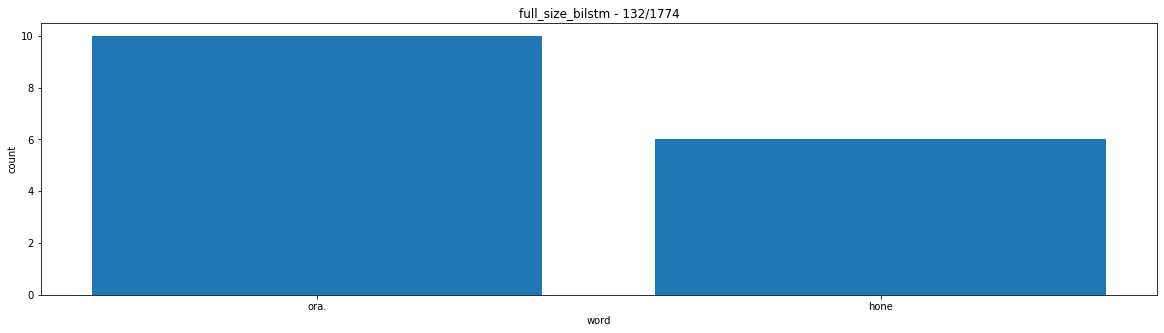

In [4]:
all_result_dict = {file.split('_err')[0]:read_json(file) for file in walk_dir(path)}

count_to_filter = 5

for key in all_result_dict:
    model_name = key
    result_dict = all_result_dict[key]
    for key in result_dict:
        if key == 'confusion_matrix':
            cm_maori = np.array(result_dict[key])
            cm_english = np.rot90(np.rot90(cm_maori))

            # calculate precision, recall, f1-score
            precision_maori = 0
            recall_maori = 0
            f1_maori = 0
            precision_english = 0
            recall_english = 0
            f1_english = 0

            for i in range(len(cm_maori)):
                precision_maori += cm_maori[i][i] / sum(cm_maori[i])
                recall_maori += cm_maori[i][i] / sum(cm_maori[:, i])
                precision_english += cm_english[i][i] / sum(cm_english[i])
                recall_english += cm_english[i][i] / sum(cm_english[:, i])

            precision_maori /= len(cm_maori)
            recall_maori /= len(cm_maori)
            f1_maori = 2 * precision_maori * recall_maori / (precision_maori + recall_maori)
            precision_english /= len(cm_english)
            recall_english /= len(cm_english)
            f1_english = 2 * precision_english * recall_english / (precision_english + recall_english)

            print(f'Confusion Matrix for {model_name}:')
            print('Maori')
            print(f'\tPrecision: {precision_maori}')
            print(f'\tRecall: {recall_maori}')
            print(f'\tF1-score: {f1_maori}')
            print('English')
            print(f'\tPrecision: {precision_english}')
            print(f'\tRecall: {recall_english}')
            print(f'\tF1-score: {f1_english}')

        else:
            predict_result = key
            word_error_dict = result_dict[key]

            # sort the word error dict by value in descending order
            word_error_dict = dict(sorted(word_error_dict.items(), key=lambda item: item[1], reverse=True))

            error_word_list = list(word_error_dict.keys())
            error_word_count_list = list(word_error_dict.values())

            c_index = find_index(error_word_count_list, count_to_filter)


            plt.figure(figsize=(20, 5))
            plt.title(model_name + ' - ' + predict_result)
            plt.xlabel('word')
            plt.ylabel('count')
            plt.bar(error_word_list[:c_index], error_word_count_list[:c_index])
            plt.show()
            break